In [27]:
!pip install psycopg2-binary sqlalchemy


In [28]:
!pip install pandasql


In [29]:
import sqlite3
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
car_sales_df=pd.read_csv('/content/Car Sales.csv')
car_sales_df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [31]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [32]:
query=""" select * from car_sales_df"""
result=pysqldf(query)
result

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [33]:
car_sales_df.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [34]:
# Rename columns to safe names
car_sales_df.rename(columns=lambda x: x.strip().replace(' ', '_').replace('($)', '').replace(')', ''), inplace=True)

print(car_sales_df.columns)


Index(['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price_', 'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [35]:
car_sales_df

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_,Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [36]:
# sales by car company

query="""
         select
            Company,
            sum(Price_) as total_price
          from car_sales_df
          group by Company
          order by total_price desc
"""
result=pysqldf(query)
result


,Company,total_price
0,Chevrolet,47655265
1,Ford,47231583
2,Dodge,44124996
3,Oldsmobile,35434512
4,Mercedes-B,34624123
5,Volkswagen,34082881
6,Mitsubishi,34062466
7,Toyota,32759564
8,Chrysler,29141873
9,Lexus,27287703


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Oldsmobile'),
  Text(4, 0, 'Mercedes-B'),
  Text(5, 0, 'Volkswagen'),
  Text(6, 0, 'Mitsubishi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Chrysler'),
  Text(9, 0, 'Lexus'),
  Text(10, 0, 'Cadillac'),
  Text(11, 0, 'Mercury'),
  Text(12, 0, 'Nissan'),
  Text(13, 0, 'Pontiac'),
  Text(14, 0, 'Volvo'),
  Text(15, 0, 'Honda'),
  Text(16, 0, 'BMW'),
  Text(17, 0, 'Saturn'),
  Text(18, 0, 'Plymouth'),
  Text(19, 0, 'Acura'),
  Text(20, 0, 'Lincoln'),
  Text(21, 0, 'Buick'),
  Text(22, 0, 'Subaru'),
  Text(23, 0, 'Audi'),
  Text(24, 0, 'Porsche'),
  Text(25, 0, 'Saab'),
  Text(26, 0, 'Jeep'),
  Text(27, 0, 'Infiniti'),
  Text(28, 0, 'Hyundai'),
  Text(29, 0, 'Jaguar')])

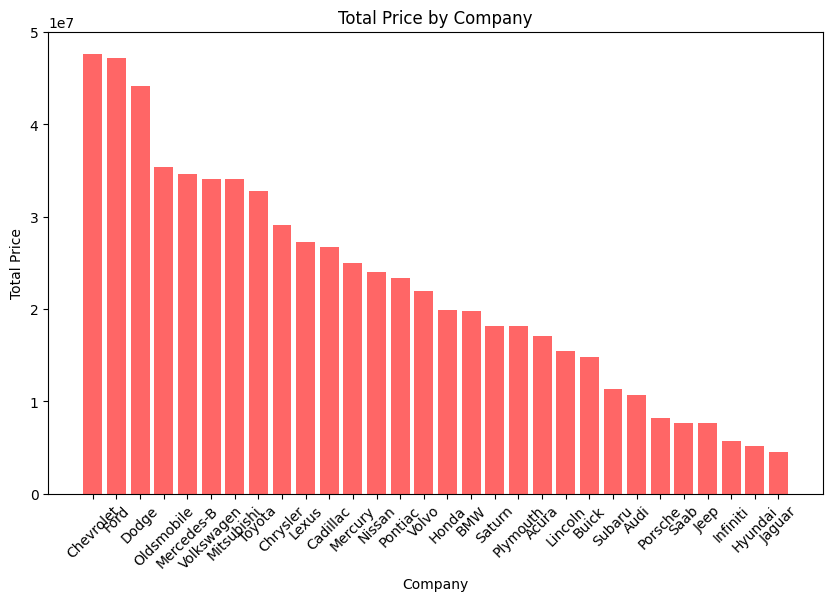

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(result['Company'], result['total_price'],color='red',alpha=0.6)
plt.xlabel('Company')
plt.ylabel('Total Price')
plt.title('Total Price by Company')
plt.xticks(rotation=45)

In [38]:
# sales by Model
#car_sales_df.head()

query="""
          select
            Model,
            sum(Price_) as total_sales,
            count(*) as total_car_sold
            from car_sales_df
            group by Model
            order by total_sales desc
            limit 10 """

result=pysqldf(query)
result

,Model,total_sales,total_car_sold
0,LS400,14263424,354
1,Jetta,12287736,382
2,Silhouette,12271849,411
3,Montero Sport,11472231,302
4,Ram Pickup,10655391,383
5,Eldorado,9725407,232
6,528i,9577927,324
7,Prizm,9386606,411
8,Diamante,9308151,418
9,LHS,9097717,330


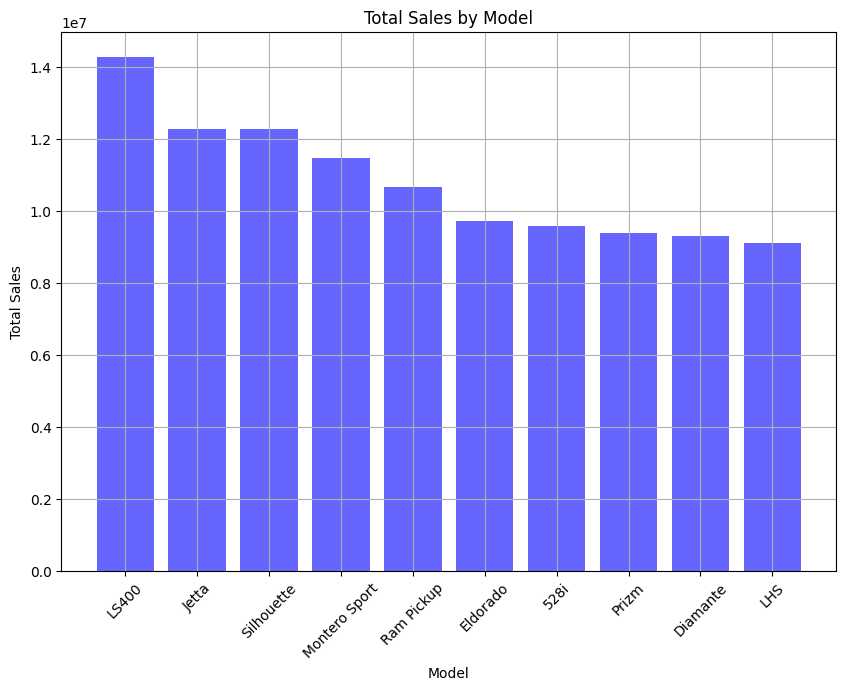

In [39]:
plt.figure(figsize=(10,7))
plt.bar(result['Model'],result['total_sales'],color='blue',alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Total Sales')
plt.title('Total Sales by Model')
plt.xticks(rotation=45)
plt.grid()
plt.show()

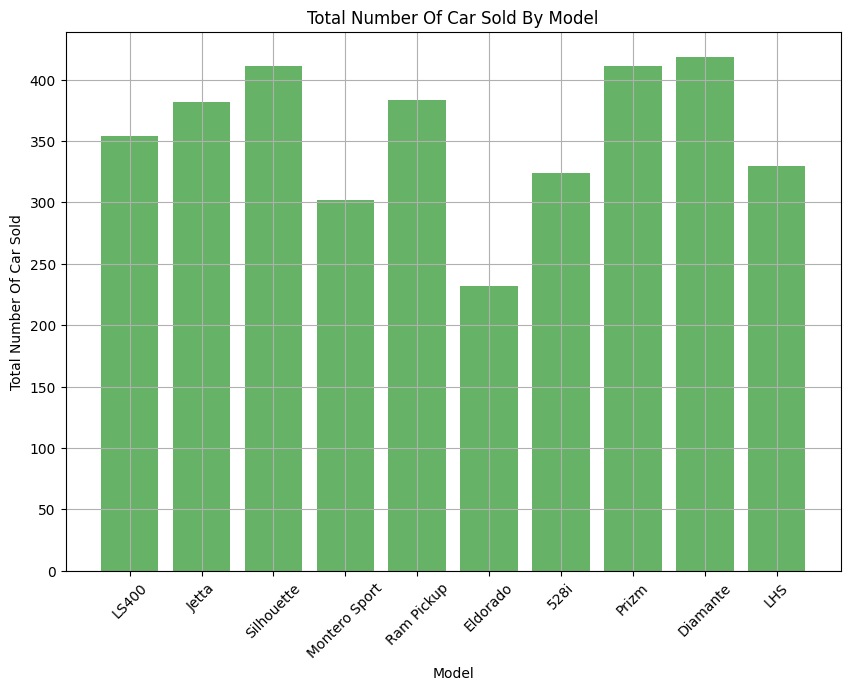

In [40]:
plt.figure(figsize=(10,7))
plt.bar(result['Model'],result['total_car_sold'],color='green',alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Total Number Of Car Sold')
plt.title('Total Number Of Car Sold By Model')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [41]:
car_sales_df.head(1)

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_,Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


In [42]:
car_sales_df['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [43]:
# sales by Transmission
query="""
           select
           Transmission,
           sum(Price_) as total_sales_per_transmission
           from car_sales_df
           group by Transmission
           order by total_sales_per_transmission """
result=pysqldf(query)
result

,Transmission,total_sales_per_transmission
0,Manual,316413245
1,Auto,355112220


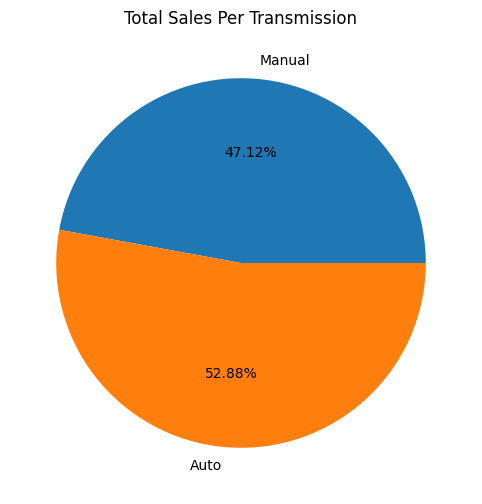

In [44]:
plt.figure(figsize=(10,6))
plt.pie(result['total_sales_per_transmission'],labels=result['Transmission'],autopct='%0.2f%%')
plt.title('Total Sales Per Transmission')
plt.show()

In [45]:
# sales by Body_Style
query="""
           select
           Body_Style,
           sum(Price_) as total_sales_per_transmission
           from car_sales_df
           group by Body_Style
           order by total_sales_per_transmission desc"""
result=pysqldf(query)
result

,Body_Style,total_sales_per_transmission
0,SUV,170617149
1,Hatchback,166234474
2,Sedan,133889619
3,Passenger,114176315
4,Hardtop,86607908


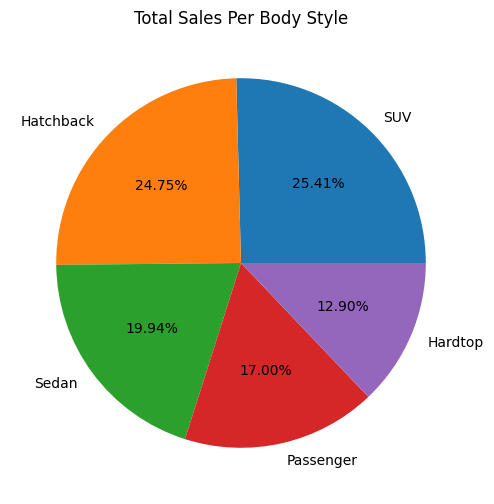

In [46]:
plt.figure(figsize=(10,6))
plt.pie(result['total_sales_per_transmission'],labels=result['Body_Style'],autopct='%0.2f%%')
plt.title('Total Sales Per Body Style')
plt.show()

In [47]:
# total sales by Dealer_Region
query="""
           select
           Dealer_Region,
           sum(Price_) as total_sales_per_region
           from car_sales_df
           group by Dealer_Region
           order by total_sales_per_region desc"""
result=pysqldf(query)
result


,Dealer_Region,total_sales_per_region
0,Austin,117192531
1,Janesville,106351234
2,Scottsdale,95969374
3,Aurora,88687382
4,Greenville,88149602
5,Pasco,88040714
6,Middletown,87134628


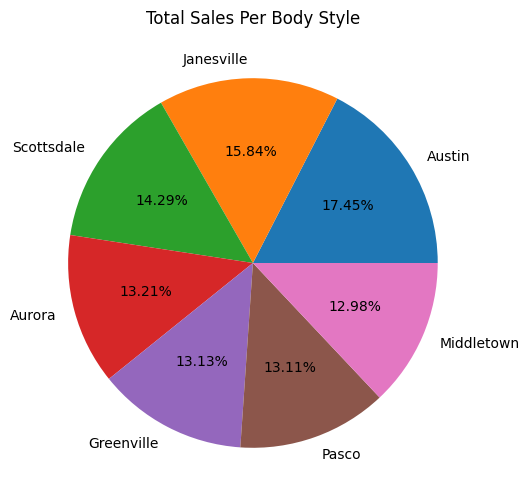

In [48]:
plt.figure(figsize=(10,6))
plt.pie(result['total_sales_per_region'],labels=result['Dealer_Region'],autopct='%0.2f%%')
plt.title('Total Sales Per Body Style')
plt.show()

In [49]:
# Convert Date to datetime first
car_sales_df['Date'] = pd.to_datetime(car_sales_df['Date'], errors='coerce')

# Convert datetime to string in YYYY-MM-DD format for SQLite
car_sales_df['Date'] = car_sales_df['Date'].dt.strftime('%Y-%m-%d')


In [50]:
# sales trend by month
query = """
SELECT
    strftime('%Y-%m', Date) AS month,
    SUM(price_) AS total_sales_per_month,
    COUNT(*) AS total_number_of_cars_sold_per_month
FROM car_sales_df
GROUP BY strftime('%Y-%m', Date)
ORDER BY strftime('%Y-%m', Date) ASC
"""

result = pysqldf(query)
result


,month,total_sales_per_month,total_number_of_cars_sold_per_month
0,2022-01,8931920,315
1,2022-02,8795365,320
2,2022-03,19502059,705
3,2022-04,22748867,800
4,2022-05,20608086,750
5,2022-06,19604211,690
6,2022-07,19935002,700
7,2022-08,23631362,810
8,2022-09,42218216,1475
9,2022-10,23991509,835


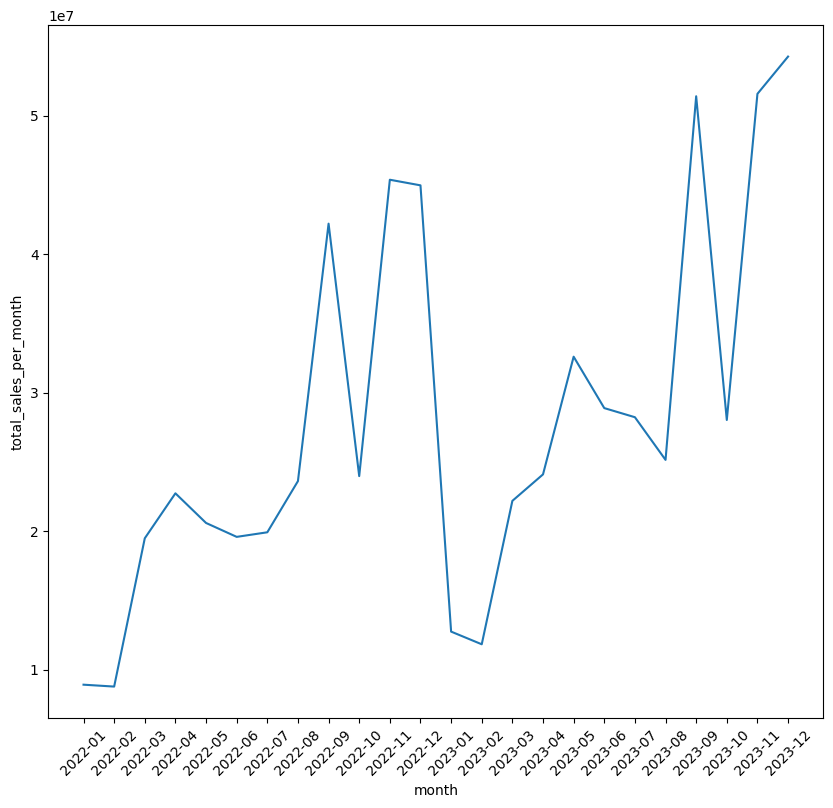

In [51]:
import seaborn as sns
plt.figure(figsize=(10,9))
sns.lineplot(data=result,x='month',y='total_sales_per_month')
plt.xticks(rotation=45)
plt.show()